# Simulating Molecular Motors walking down a microtubule

In lecture, we discussed the evolution of the positional distribution function of a molecular motor that processively walks down a biopolymer (e.g. Kinesin V walking down a microtubule). In the simplest models, this distribution function satisfies a Smoluchowski equation of the following form. The probability density to observe the walker at position $x$ at time $t$ is given by

$$ \partial_t p(x,t)= D \partial_x^2 p - v \partial_x p $$

where $D$ is the diffusivity of the walker and $v$ is its velocity.

Here, we'd like to directly time integrate the above equation to see how the pdf evolves over time. 

Initializing the simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Diffusivity of the random walkers
D = .2
# mean speed of the random walkers
v = 1.
# total length of microtubule (a.u.)
w = 40.
# simulation step size 
dx = 0.01
nx = int(w/dx)
# time step of the simulation
dx2 = dx*dx
dt = dx2 / (2 * D )




uini = np.zeros(nx)
u = uini.copy()

x = np.linspace(0,w,nx)

# Initial conditions - ensemble of random walkers sharply peaked at (cx
r, cx = .2, 10
r2 = r**2
for i in range(nx):
    p2 = (i*dx-cx)**2 
    if p2 < r2:
        uini[i] = 1/(2*r)


The core simulation algorithm.

In [ ]:
def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1] = u0[1:-1] + D * dt * (
          (u0[2:] - 2*u0[1:-1] + u0[:-2])/dx2 ) - v * dt * (
          (u0[2:] - u0[:-2] )/(2*dx) )

    u0 = u.copy()
    return u0, u


Running the simulations and plotting the output at regular time intervals

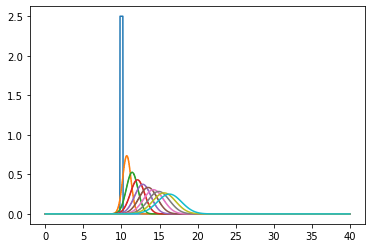

In [ ]:
u0 = uini.copy()

# total simulation time
TotTime = 7
# Times of outputs
nsteps = 10

fig = plt.figure()
ax = fig.add_subplot(111)


for m in range(int(TotTime/dt)):
    u0, u = do_timestep(u0, u)
    if m in range(0, int(TotTime/dt), int(TotTime/(dt * nsteps))):
        ax.plot(x[1:-1], u.copy()[1:-1])
        
plt.show()


### In the co-moving frame

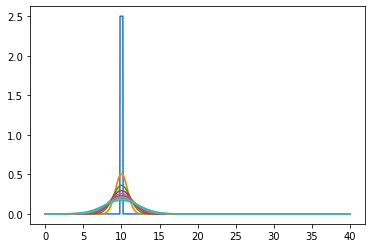

In [ ]:
u0 = uini.copy()

# total simulation time
TotTime = 15

# Times of outputs
nsteps = 10

fig = plt.figure()
ax = fig.add_subplot(111)


for m in range(int(TotTime/dt)):
    u0, u = do_timestep(u0, u)
    if m in range(0, int(TotTime/dt), int(TotTime/(dt * nsteps))):
        indexshift=int(v*m*dt/dx)
        ushifted=np.pad(u.copy()[indexshift:], [(0, indexshift)], mode='constant')
        ax.plot(x[1:-1], ushifted[1:-1])
        
plt.show()



### Diffusion equation without bias

Only works far away from the boundaries.

In [ ]:
def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1] = u0[1:-1] + D * dt * (
          (u0[2:] - 2*u0[1:-1] + u0[:-2])/dx2 ) 

    u0 = u.copy()
    return u0, u


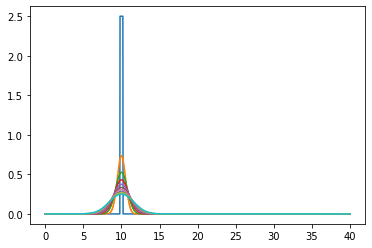

In [ ]:
u0 = uini.copy()

# total simulation time
TotTime = 7
# Times of outputs
nsteps = 10

fig = plt.figure()
ax = fig.add_subplot(111)


for m in range(int(TotTime/dt)):
    u0, u = do_timestep(u0, u)
    if m in range(0, int(TotTime/dt), int(TotTime/(dt * nsteps))):
        ax.plot(x[1:-1], u.copy()[1:-1])
        
plt.show()

### Diffusion in two dimensions

An example of a two dimensional diffusion process is the diffusion of heat from a circular source across a rectangular plate. The initial temperature is `Tcold` and the temperature of the heat source is `Thot`.

0 1
10 2
50 3
100 4


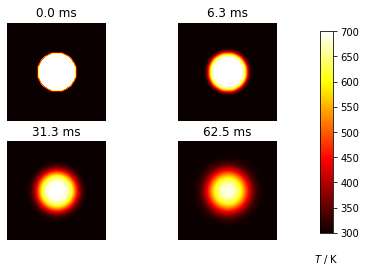

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()